### Many people say the weather in Los Angeles has changed drastically over the years. But is that really the case? This graph shows the highest temperature for each month from 1887 to the present (data for September to December 2024 are not yet available). Additionally, the average trend line for each month is included. There are small fluctuations and occasional spikes, but overall, no drastic long-term warming trends are evident. (The numbers on the graph represent the average high temperature for each month over the period.)



### First, I collected data and then used Tableau to create the graph.

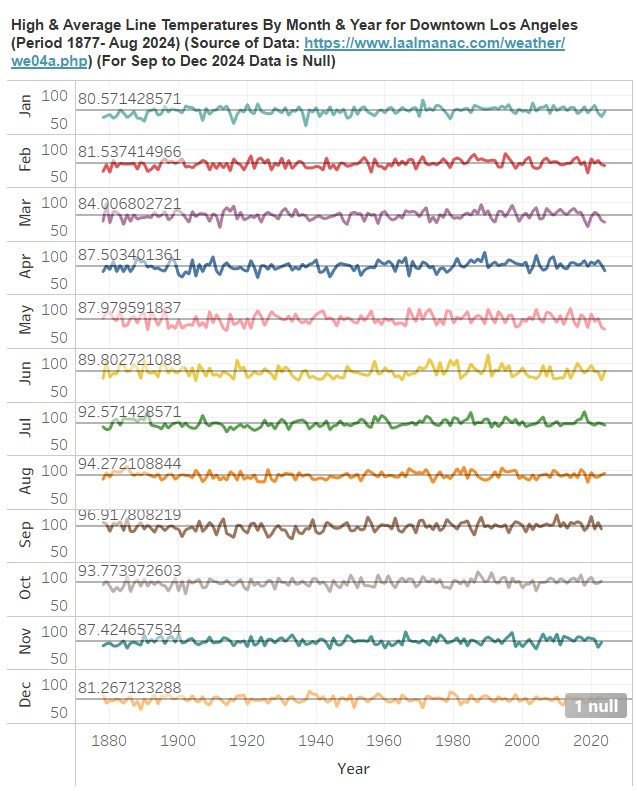

In [1]:
from IPython.display import Image

# Display a local image
Image(filename=r"C:\Users\lasra\Desktop\Wheater\LA_W.jpg")


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the weather data page
url = "https://www.laalmanac.com/weather/we04a.php"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the weather data
table = soup.find("table")

# Extract all rows from the table
rows = table.find_all("tr")

# Initialize lists to store the data
data = []

# Loop through each row and extract the columns (cells)
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]  # Get text and remove any extra spaces
    if len(cols) > 0:
        data.append(cols)

# Convert the list into a DataFrame
df = pd.DataFrame(data)

# The first row is the header, so let's assign it to the DataFrame
df.columns = df.iloc[0]
df = df[1:]

# Clean the data by replacing "---" with "NA"
df.replace("---", "NA", inplace=True)

df


,2024,High,80,79,75,81,75,91,90,97,---,---,---,---,---
1,Avg.,58.5,58.2,60.3,62.3,64.0,69.9,74.5,75.5,NA,NA,NA,NA,NA,None
2,Low,42,43,48,46,52,57,58,59,NA,NA,NA,NA,NA,None
3,2023,High,73,80,77,89,77,79,92,95,94,96,86,83,96
4,Avg.,55.6,55.9,57.0,62.6,63.9,66.8,75.1,75.4,72.4,70.3,65.3,62.0,65.2,None
5,Low,42,40,44,48,50,58,60,63,59,49,50,48,40,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Avg.,55.2,55.3,56.6,58.7,63.3,66.7,69.7,70.7,69.6,64.6,59.2,54.6,62.0,None
440,Low,37,41,41,42,47,47,52,54,50,43,37,30,30,None
441,1877,High,NA,NA,NA,NA,NA,NA,93,87,93,80,86,81,NA
442,Avg.,NA,NA,NA,NA,NA,NA,72.8,71.4,71.2,64.1,62.9,56.6,NA,None


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the weather data page
url = "https://www.laalmanac.com/weather/we04a.php"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the weather data
tables = soup.find_all("table")

# Initialize a list to store all the rows of data
data = []

# Loop through all tables and extract relevant rows
for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        # Extract each cell's text
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]  # Clean the data by removing extra spaces
        if len(cols) > 0:
            data.append(cols)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Clean the data: replace "---" with "NA" (handling any missing values)
df.replace("---", "NA", inplace=True)




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2024,High,80,79,75,81,75,91,90,97,NA,NA,NA,NA,NA
1,Avg.,58.5,58.2,60.3,62.3,64.0,69.9,74.5,75.5,NA,NA,NA,NA,NA,None
2,Low,42,43,48,46,52,57,58,59,NA,NA,NA,NA,NA,None
3,2023,High,73,80,77,89,77,79,92,95,94,96,86,83,96
4,Avg.,55.6,55.9,57.0,62.6,63.9,66.8,75.1,75.4,72.4,70.3,65.3,62.0,65.2,None


In [12]:
# Show first few rows of the DataFrame to verify
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2024,High,80,79,75,81,75,91,90,97,NA,NA,NA,NA,NA
1,Avg.,58.5,58.2,60.3,62.3,64.0,69.9,74.5,75.5,NA,NA,NA,NA,NA,None
2,Low,42,43,48,46,52,57,58,59,NA,NA,NA,NA,NA,None
3,2023,High,73,80,77,89,77,79,92,95,94,96,86,83,96
4,Avg.,55.6,55.9,57.0,62.6,63.9,66.8,75.1,75.4,72.4,70.3,65.3,62.0,65.2,None
5,Low,42,40,44,48,50,58,60,63,59,49,50,48,40,None
6,2022,High,78,86,85,95,89,90,93,92,103,93,79,84,103
7,Avg.,58.5,58.8,61.4,64.3,64.8,71.0,72.4,75.2,77.5,68.7,60.2,57.5,65.9,None
8,Low,42,37,43,51,51,58,60,62,60,53,46,42,37,None
9,2021,High,88,82,88,90,85,90,90,92,94,93,90,73,94


In [10]:
df.shape

(444, 15)

In [15]:
# Filter out rows where the Temp column is "Avg." or "Low"
df_filtered = df[~df[0].isin(["Avg.", "Low"])]

# Reset the index after filtering
df_filtered.reset_index(drop=True, inplace=True)

# Display the new DataFrame
df_filtered.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2024,High,80,79,75,81,75,91,90,97,NA,NA,NA,NA,NA
1,2023,High,73,80,77,89,77,79,92,95,94,96,86,83,96
2,2022,High,78,86,85,95,89,90,93,92,103,93,79,84,103
3,2021,High,88,82,88,90,85,90,90,92,94,93,90,73,94
4,2020,High,83,88,82,93,95,98,92,98,111,101,91,84,111


In [17]:
# Rename the columns
df_filtered.columns = ['Year', 'High','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']

# Display the updated DataFrame to confirm the changes
df_filtered.head()

,Year,High,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2024,High,80,79,75,81,75,91,90,97,NA,NA,NA,NA,NA
1,2023,High,73,80,77,89,77,79,92,95,94,96,86,83,96
2,2022,High,78,86,85,95,89,90,93,92,103,93,79,84,103
3,2021,High,88,82,88,90,85,90,90,92,94,93,90,73,94
4,2020,High,83,88,82,93,95,98,92,98,111,101,91,84,111


In [18]:
df_filtered.tail()

,Year,High,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
143,1881,High,71,86,89,94,89,88,96,100,102,82,81,79,102
144,1880,High,76,70,74,83,97,83,85,92,91,89,85,80,97
145,1879,High,74,80,99,88,97,104,84,98,101,96,84,76,104
146,1878,High,72,71,76,80,89,81,88,89,103,91,81,88,103
147,1877,High,NA,NA,NA,NA,NA,NA,93,87,93,80,86,81,NA


In [22]:
# Save the DataFrame to a CSV file
csv_file_path = r"C:\Users\lasra\Desktop\Wheater\weather_data_los_angeles.csv"
df_filtered.to_csv(csv_file_path, index=False)

In [ ]:
## Source: https://www.laalmanac.com/weather/we04a.php